In [33]:
%matplotlib inline
from models import VAE_3D, GAN, MultiStage_VAE, VQ_VAE
from torch.utils.data import DataLoader
import tqdm
import torch
import yaml
import math
from torchvision.utils import make_grid

from utils import load_dataset, training_steps, evaluation_step


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
with open('./parameters/VAE_colorMNIST_parameters.yaml', 'rb') as f:
    config = yaml.safe_load(f)

In [14]:
BS = 64
BS_test = 1000

data, unnormalize, nb_classes = load_dataset(config)
dataloader = DataLoader(data, batch_size = BS, shuffle = True)
img_shape = dataloader.dataset[0][0].shape

test_data, _, _ = load_dataset(config, training = False)
test_dataloader = DataLoader(test_data, batch_size = BS_test, shuffle = True)


In [24]:
batch, label = next(iter(test_dataloader))
batch = batch.to(device)

In [18]:
vae = VAE_3D(config, img_shape, nb_classes)
vae = vae.to(device)
losses = training_steps(vae, dataloader, unnormalize)

VAE epoch: 9.000 Loss: 0.157: 100%|██████████| 938/938 [00:24<00:00, 37.61it/s]


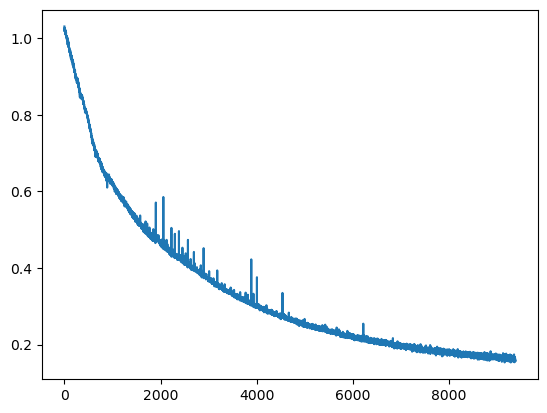

In [19]:
plot(losses)

In [28]:
vae.eval()
with torch.no_grad():
    out = vae(batch)
    loss_dict = vae.loss_function(out, batch, unnormalize)
loss_dict

{'loss': tensor(0.1613, device='cuda:0'),
 'recon_loss': tensor(0.1610, device='cuda:0'),
 'kl_loss': tensor(30.0155, device='cuda:0')}

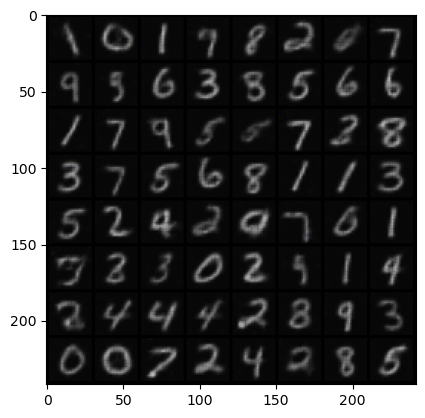

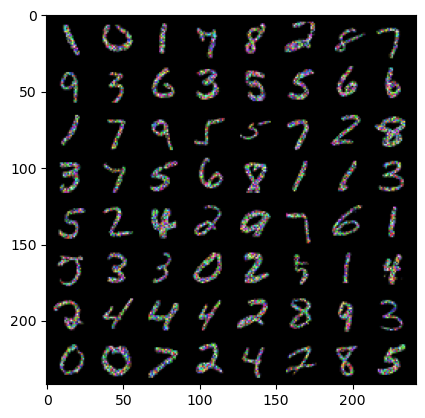

In [36]:
imshow(make_grid(unnormalize(out[0][:BS]).cpu()).permute(1,2,0))
show()
imshow(make_grid(unnormalize(batch[:BS]).cpu()).permute(1,2,0))

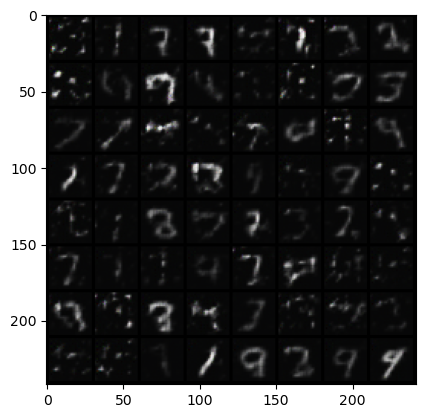

In [39]:
vae_sample = vae.sample(BS)
imshow(make_grid(unnormalize(vae_sample).cpu()).permute(1,2,0))